# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

In [66]:
pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

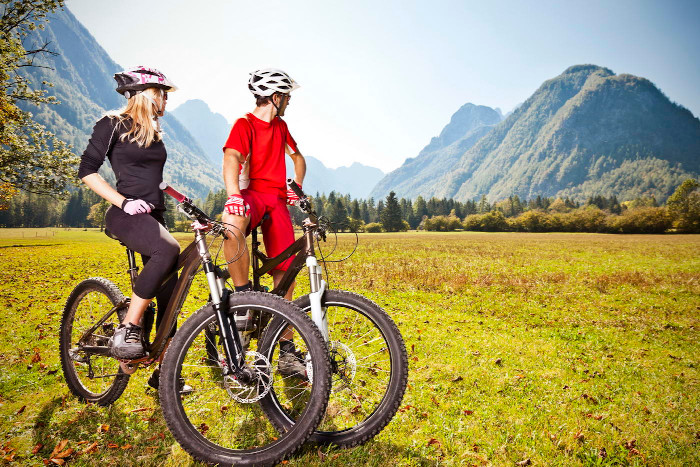

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.


---

Скачаем данные, загрузим их с помощью `pandas` и разделим на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику будем проводить только на обучающей части данных.

In [67]:
data = pd.read_csv('./day.csv')[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 
                                 'hum', 'windspeed', 'cnt']]
train, test = train_test_split(data, test_size=0.2)
train.head(5)

season  mnth  holiday  weekday  workingday  weathersit      temp  \
87        2     3        0        2           1           1  0.302500   
651       4    10        0        6           0           1  0.393333   
514       2     5        0        2           1           1  0.722500   
65        1     3        0        1           1           1  0.261739   
38        1     2        0        2           1           1  0.220833   

        atemp       hum  windspeed   cnt  
87   0.292908  0.314167   0.226996  2425  
651  0.391396  0.494583   0.146142  7109  
514  0.672992  0.684583   0.295400  5743  
65   0.238461  0.551304   0.341352  1872  
38   0.198246  0.537917   0.361950  1530

#### 1. Визуальный анализ

Посмотрим по графикам, как *целевой признак зависит от остальных* и поймем характер этой зависимости. Постараемся строить информативные графики, а из финального решения убирать те, которые не пригодились.

Учтем, что какие-то признаки категориальные, а какие-то &mdash; вещественные.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

In [68]:
categorial_features = ['workingday', 'weathersit', 'season', 'mnth', 'weekday']  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

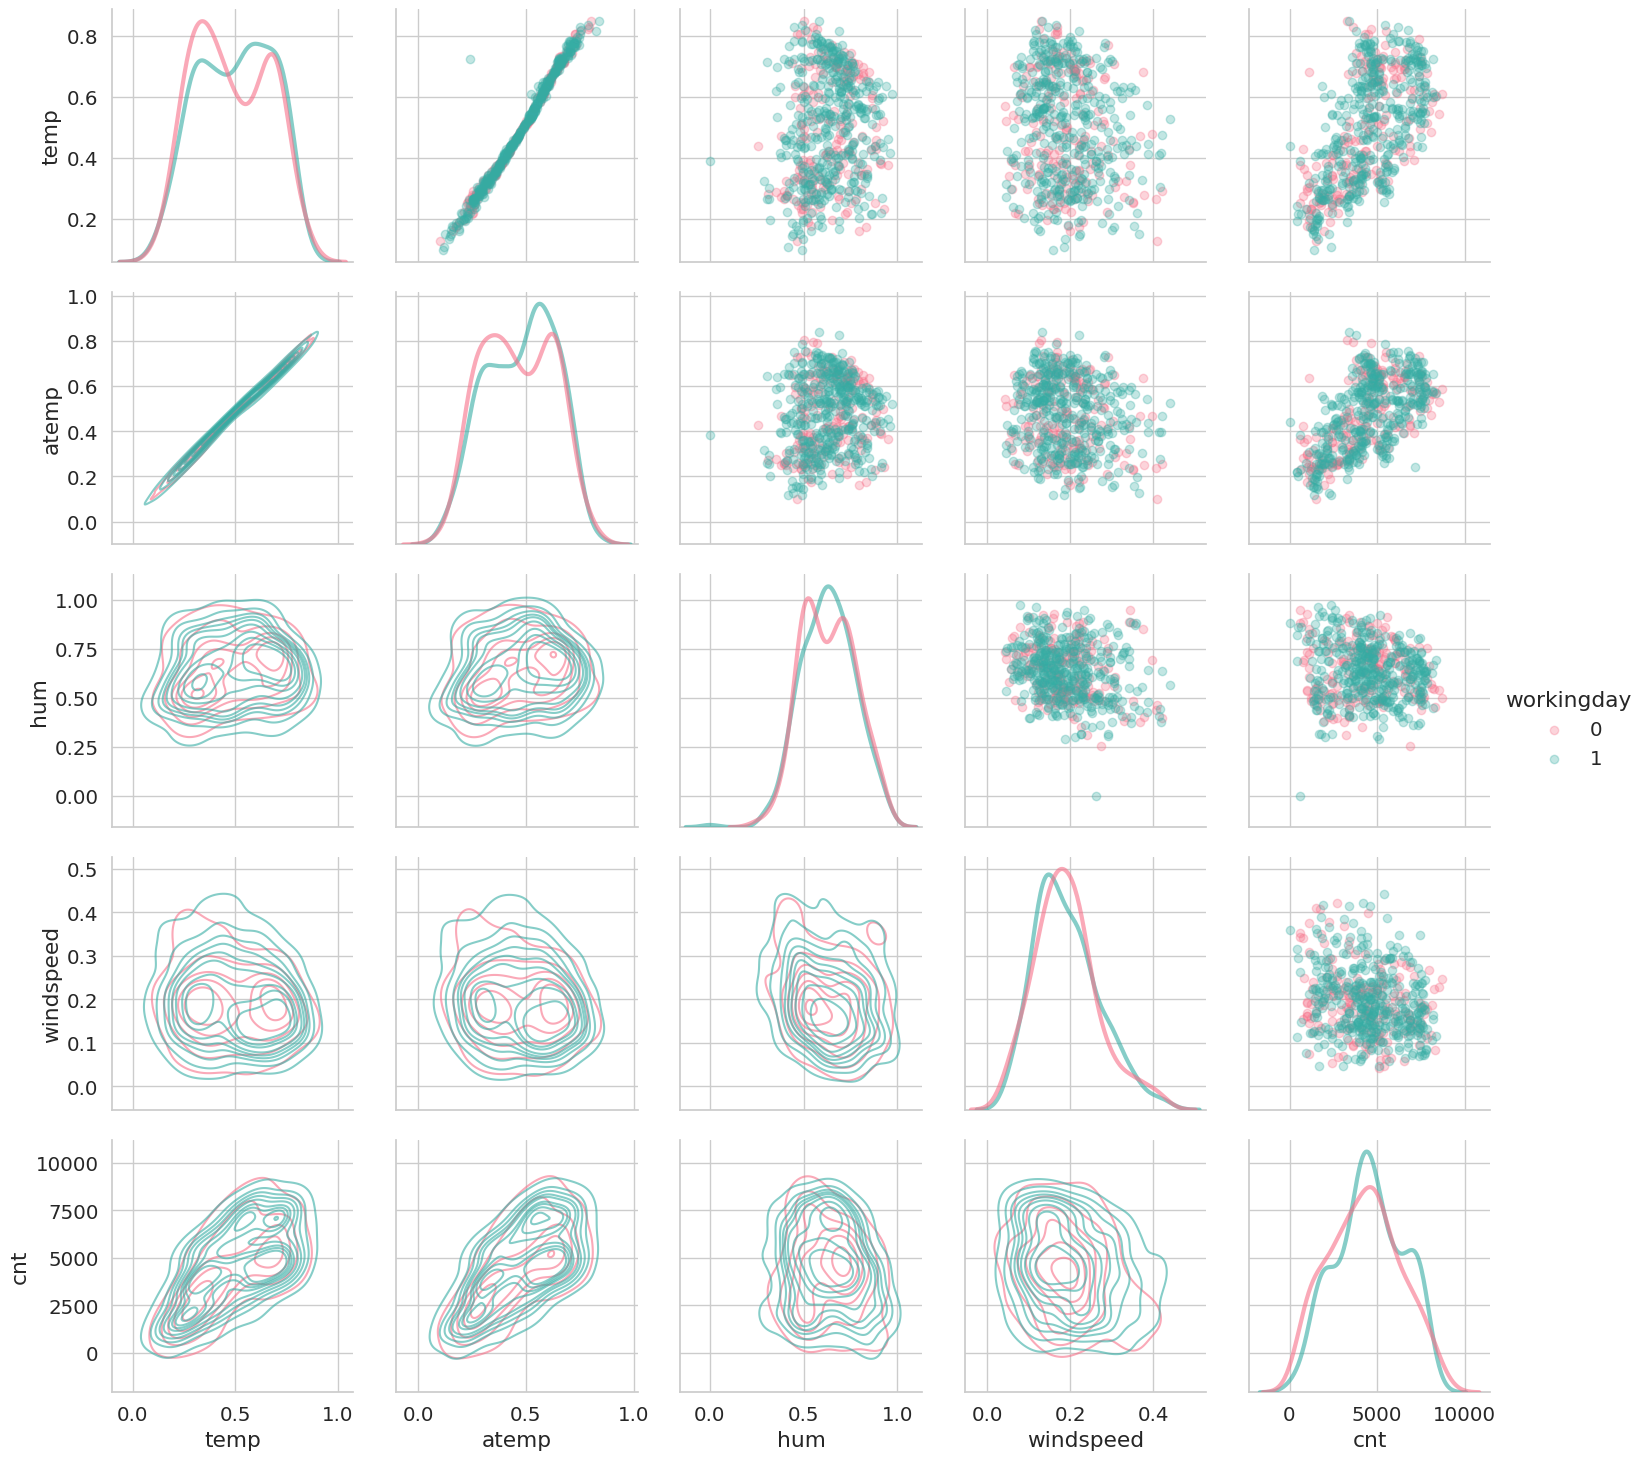

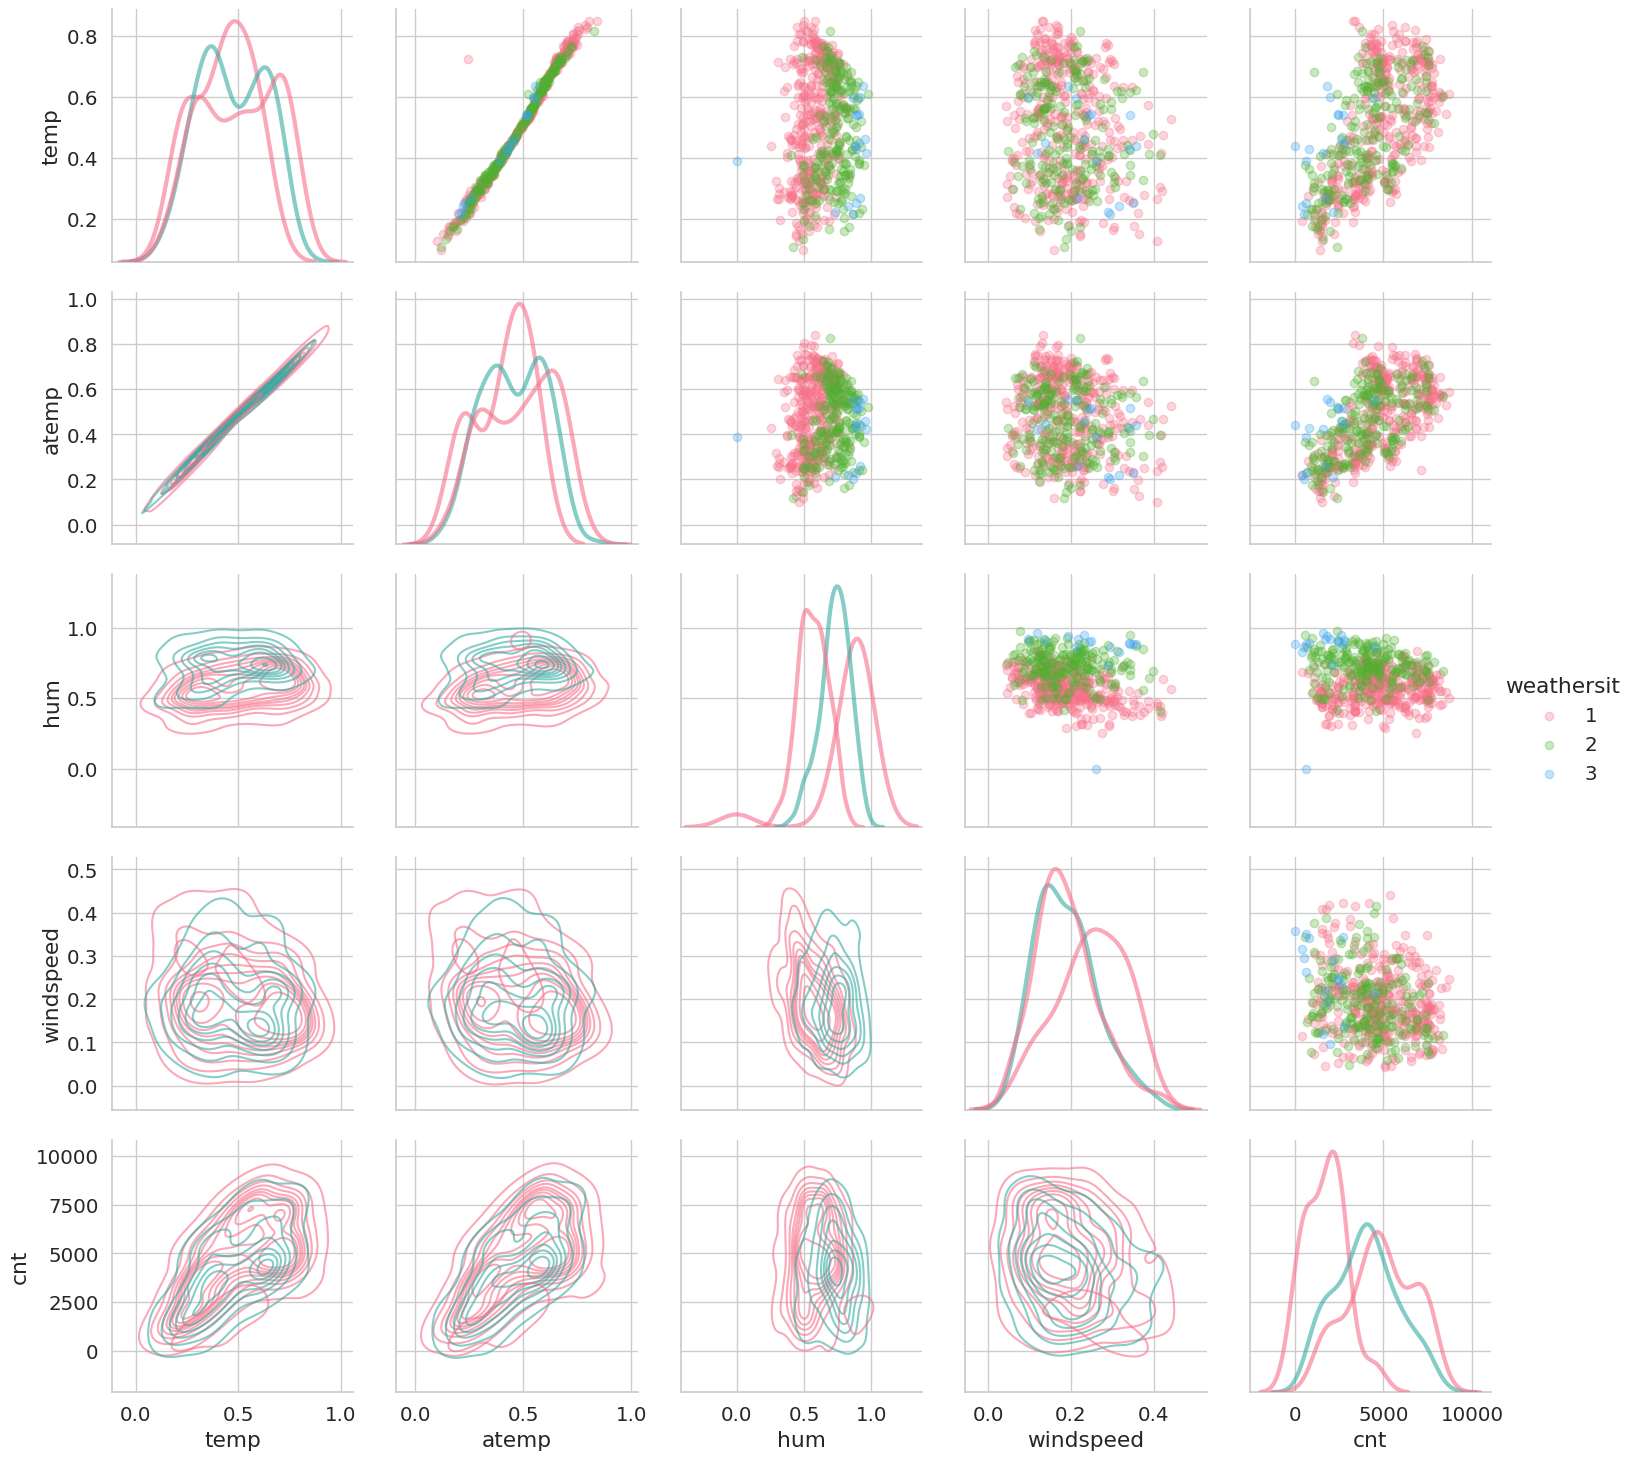

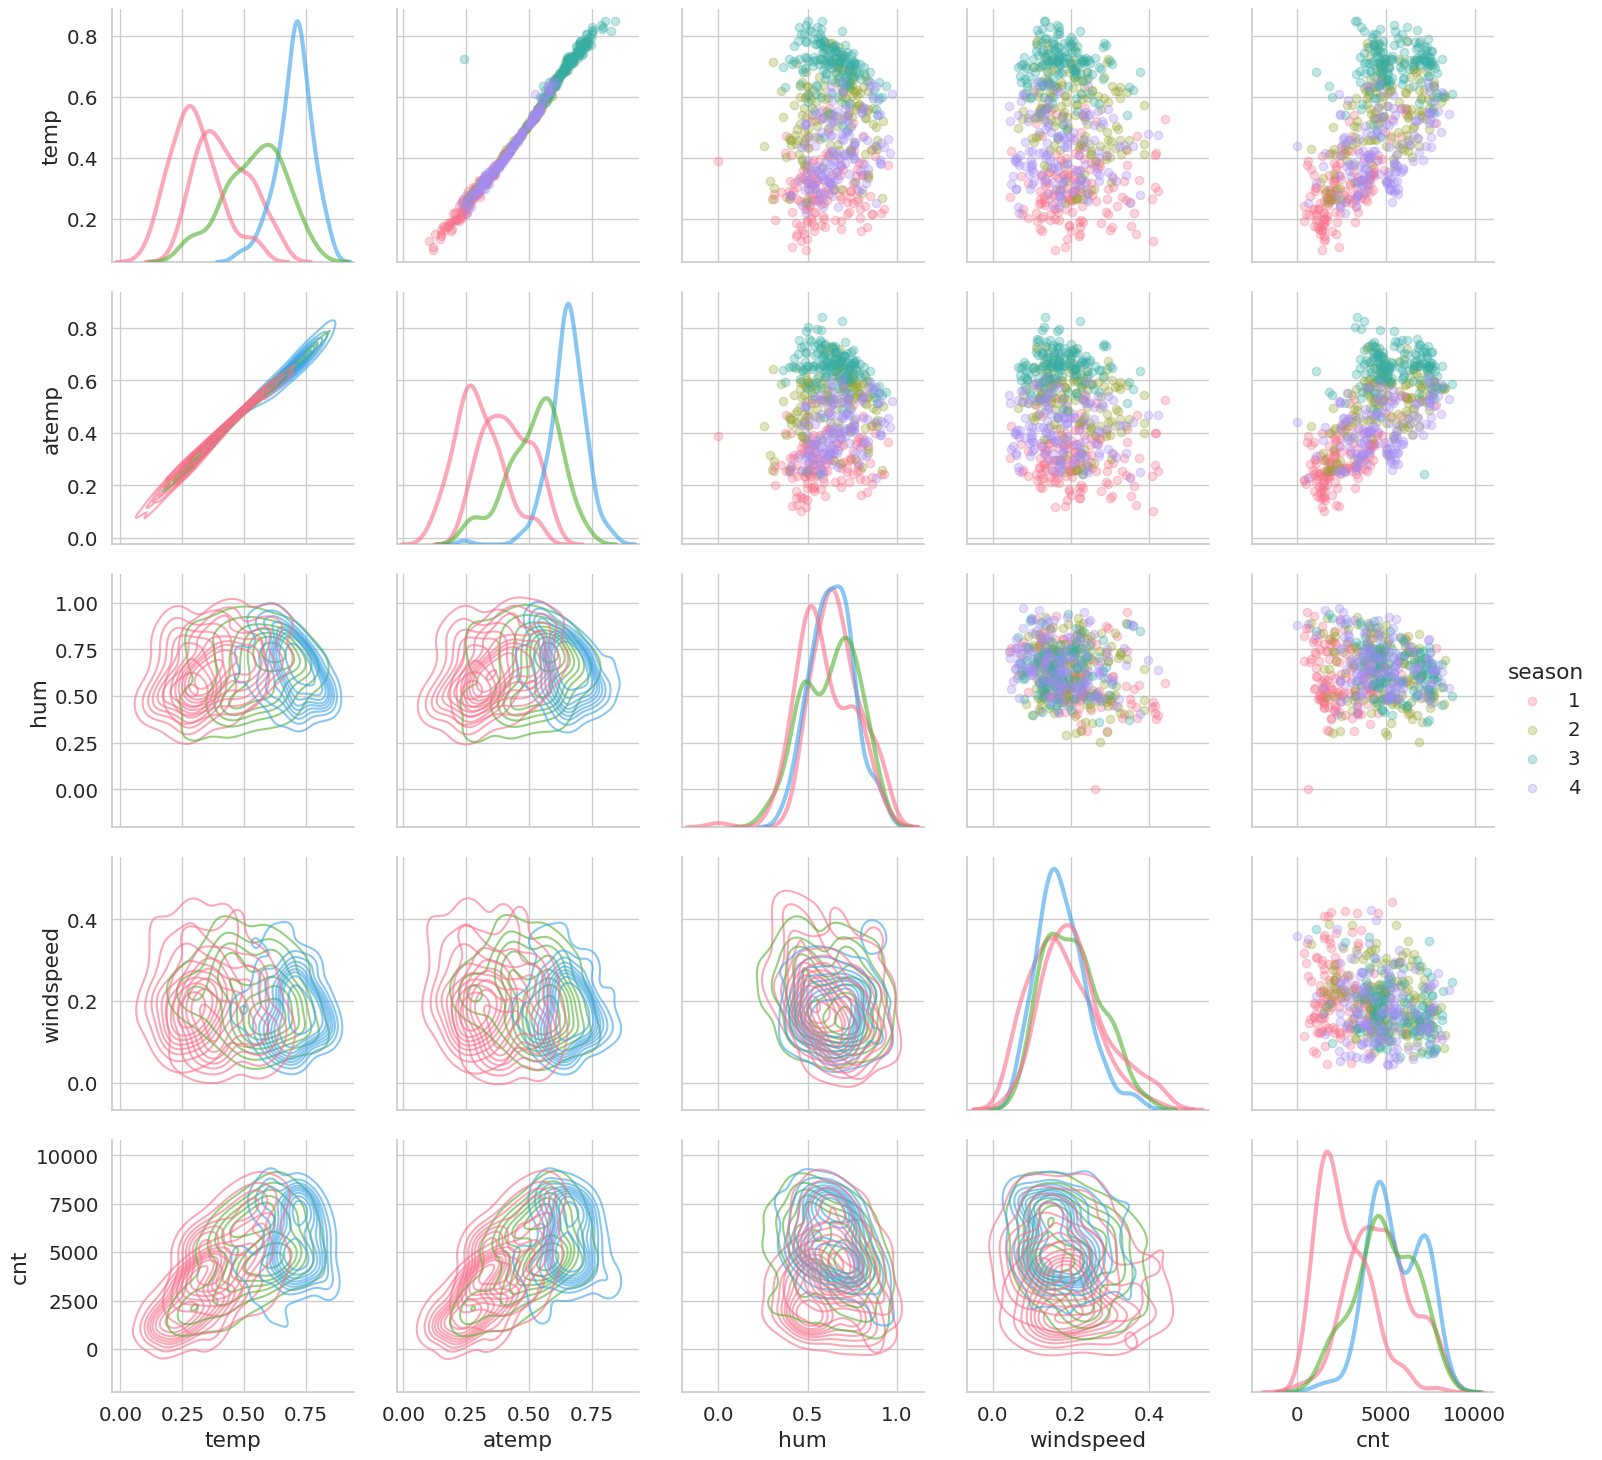

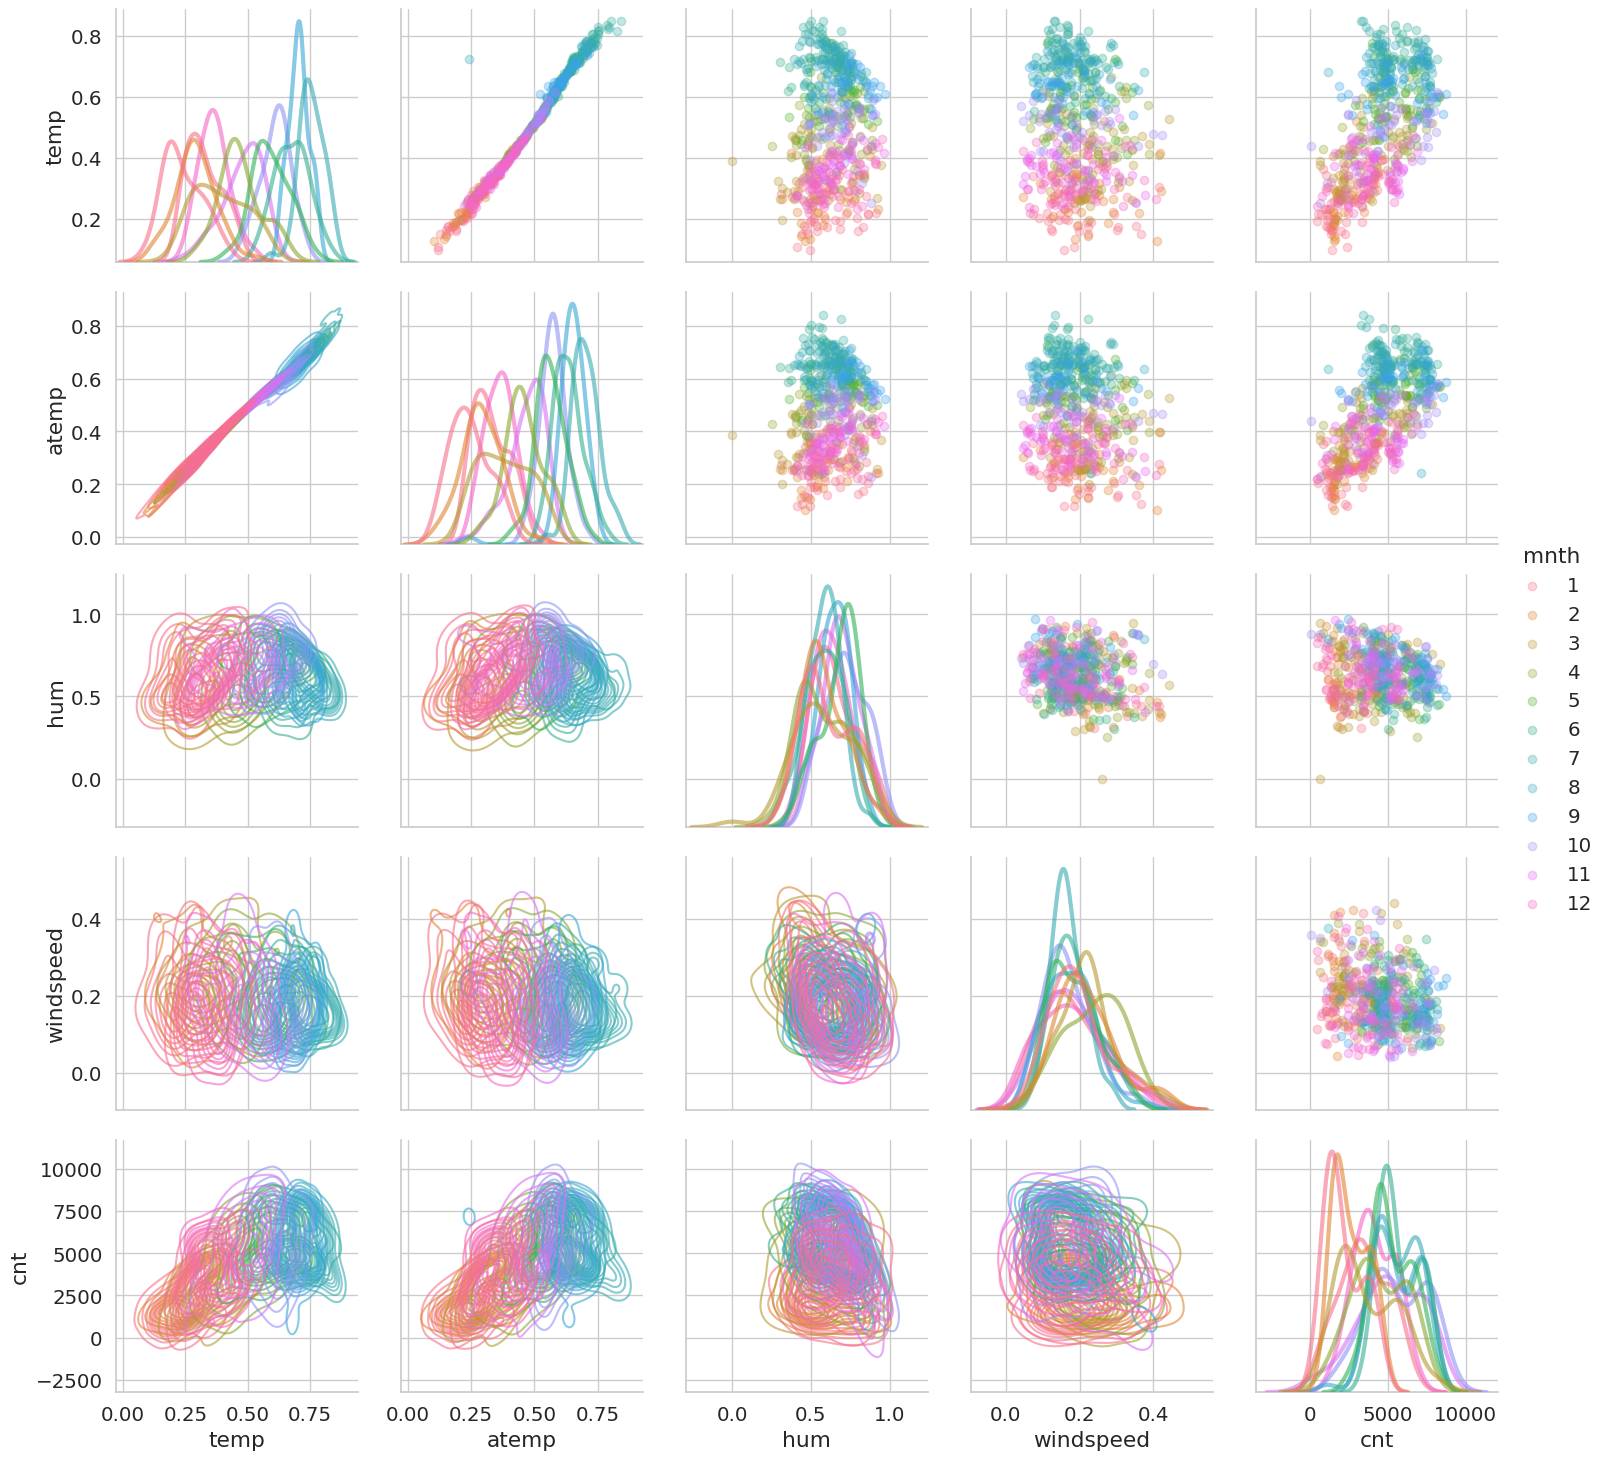

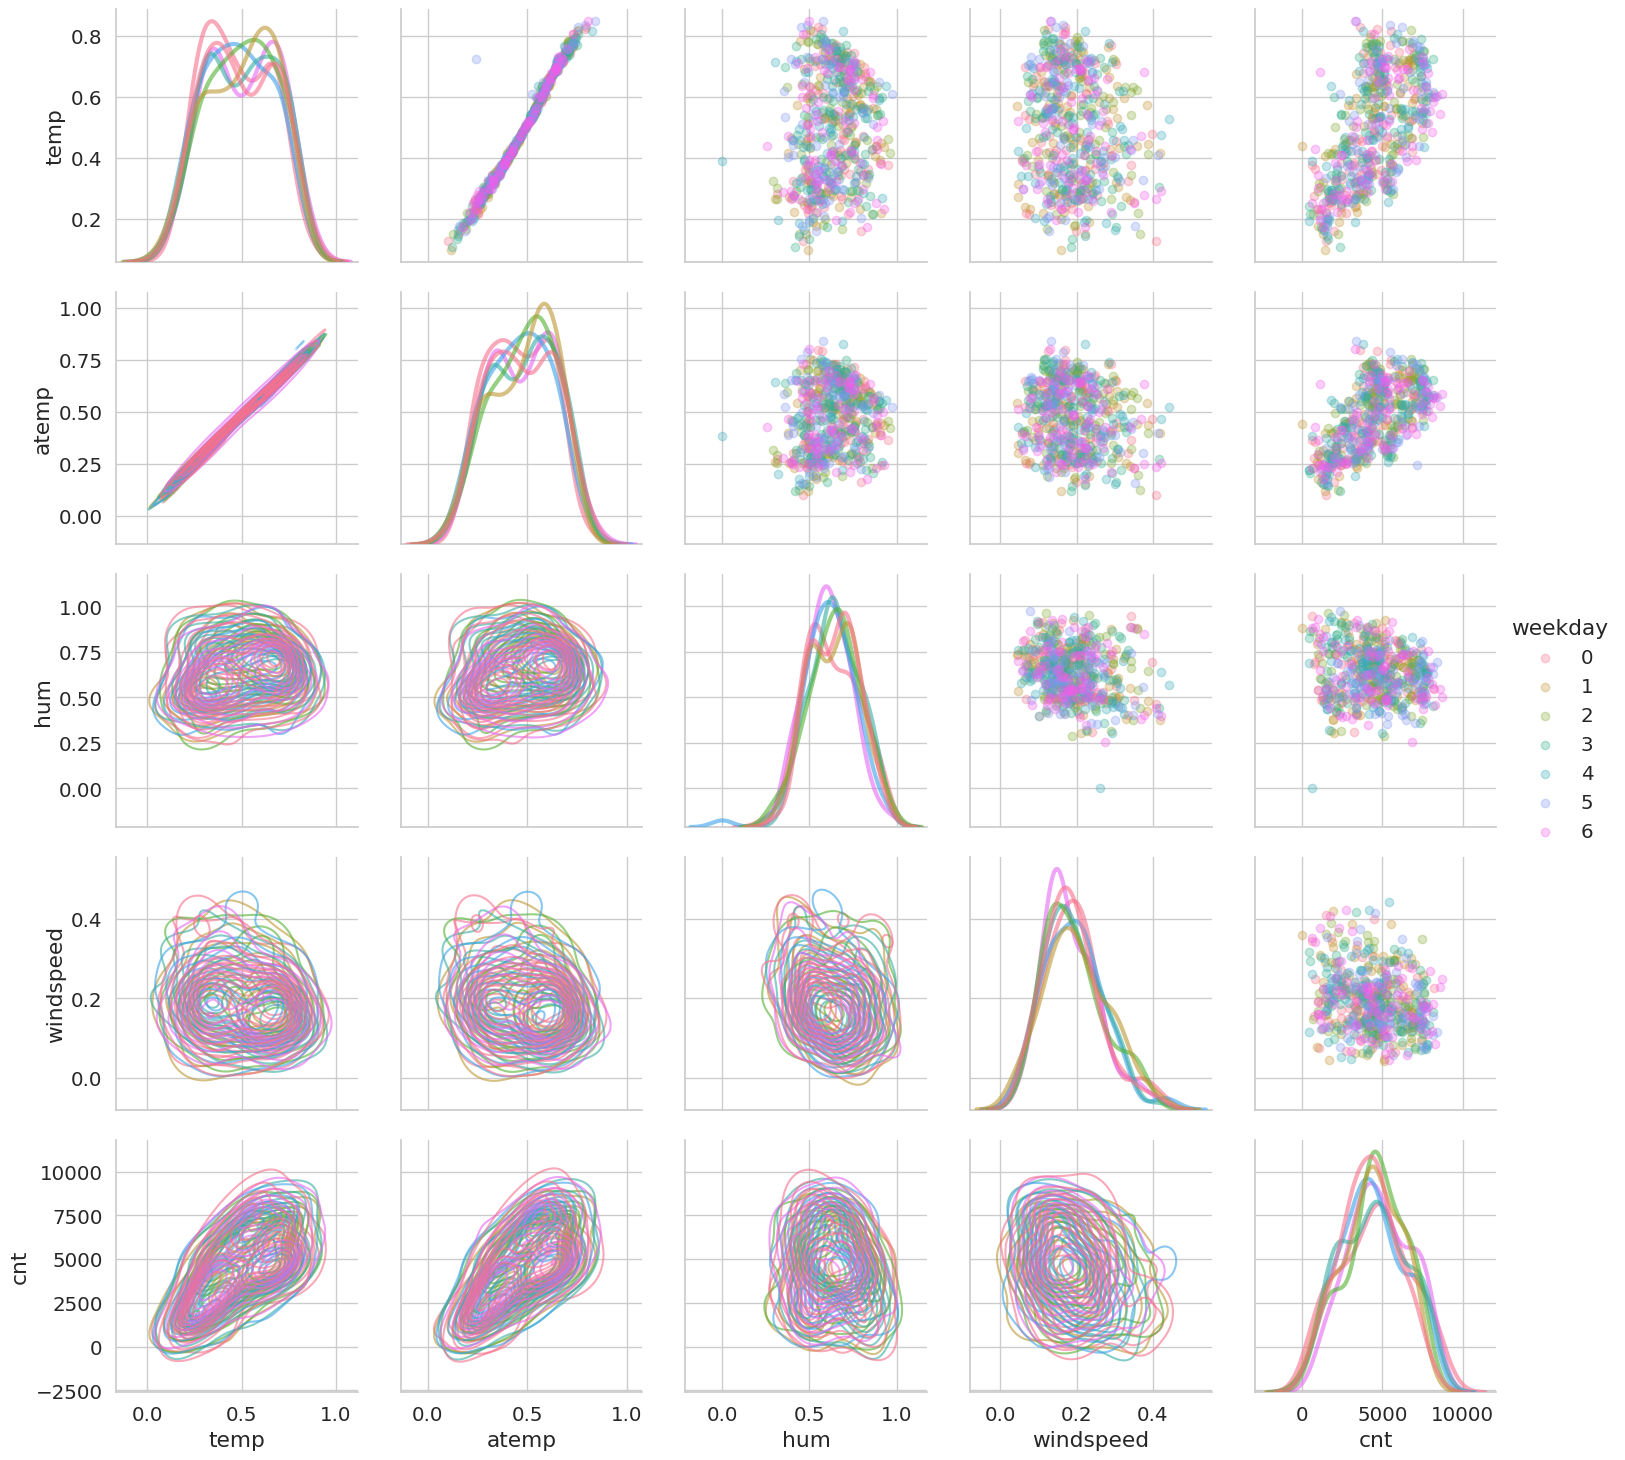

In [69]:
for hue in categorial_features:
    g = sns.PairGrid(train[['temp', 'atemp', 'hum', 'windspeed', 'cnt', hue]], 
                     hue=hue, diag_sharey=False, height=3, palette="husl")
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании
    
    g.add_legend()

Поскольку количество точек для параметра 'holiday' мало, то графики получаются малоинформативными. Поэтому исключим эту категорию из рассмотрения. 

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**
* Выбросы присутствуют, это можно заметить по самым правым колонкам.
* Видна зависимость $cnt = \sqrt{temp}$
* Судя по графикам $temp(atemp)$ эти категории зависимы, поэтому достаточно выбрать лишь один из них. Пусть это будет `temp`.



#### 2. Подготовка данных

Опишем по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков.

**Процедура предобработки данных:**

**a).** По итогам визуального анализа подберем ограничения таким образом, чтобы исключить выбросы. \
**б).** Из вещественных признаков оставим только `temp, hum, windspeed`  \
**в).** Учтём нелинейную зависимость `temp`. \
**г).** Закодируем категориальные признаки с помощью класса `OneHotEncoder`. 

Реализуем данную процедуру.

In [70]:
train = train[(train.hum >= 0.39)
              & (train.hum <= 0.9) 
              & (train.windspeed <= 0.4) 
              & (train.temp >= 0.15) & (train.temp <= 0.8)]

categorial_features = ['workingday', 'weathersit', 'season', 'mnth', 'weekday']  # категориальные признаки
real_features = ['temp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

In [71]:
# учтем нелинейную зависимость температуры
train.temp = train.temp**1.6

encoder = OneHotEncoder(drop='first', sparse_output=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем

# cоединим вместе вещественные признаки и закодированные категориальные
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(527, 26)

#### 3. Обучение модели и ее анализ

Обучим линейную регрессию из `sklearn` на полученных данных и посмотрим на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [72]:
model = LinearRegression(fit_intercept=True) # объявляем модель
model.fit(X_train, train[target_feature]) # обучаем

print(model.coef_)
print(model.intercept_)

[ 6.63549352e+03 -4.23637384e+03 -4.79167529e+03  9.60199885e+02
 -1.05609724e+02 -1.04281329e+03  1.00912250e+03  6.46031633e+02
  1.57128501e+03  3.02981220e+02  5.34126729e+02  2.20920868e+00
  1.92038046e+02 -3.53671980e+02 -3.76593089e+02 -3.76019182e+02
  7.96730745e+02  4.44093270e+02 -1.74577742e+02 -4.75793468e+01
 -7.56567142e+02 -6.83306903e+02 -6.97302741e+02 -6.84875102e+02
 -5.55085785e+02  4.71428777e+02]
4804.28182987344


Посмотрим на результат обучения. Оценки коэффициентов перед признаками. 

Посчитаем ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

Во избежании ошибок мы определили преобразования только для обучающих данных, и только теперь применим их для тестовых.

In [73]:
test = test[(test.hum >= 0.39)
              & (test.hum <= 0.9) 
              & (test.windspeed <= 0.4) 
              & (test.temp >= 0.15) & (test.temp <= 0.8)]

test.temp = test.temp**1.6

# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

# Выполним предсказание построенной ранее моделью с помощью метода `predict`
test_preds = model.predict(X_test)

In [74]:
def my_metrics(data, target_feature, test_preds):
    rmse = np.sqrt(((data[target_feature] - test_preds) ** 2).mean())
    mae = metrics.mean_absolute_error(data[target_feature], test_preds)
    mape = 100 * (np.abs(data[target_feature] - test_preds) / data[target_feature]).mean()
    return rmse, mae, mape

rmse, mae, mape = my_metrics(test, target_feature, test_preds)
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")
print(f"MAPE = {mape}")

RMSE = 1206.497998159874
MAE = 1044.2747966010772
MAPE = 26.606486067083885


Попробуем посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудем про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Искомая формула имеет вид: $\^{\theta} = (X^{T}\cdot X)^{-1}\cdot X^{T}Y$, где в качестве $X$ выступает $X\_train$, а в качестве $Y$ - `train[target_feature]`

In [75]:
X_ones = np.hstack([X_train, np.ones((X_train.shape[0],1))])
theta = np.dot(np.linalg.inv(X_ones.T @ X_ones), np.dot(X_ones.T, train[target_feature]))

# обработка тестовых данных
X_ones_test = np.hstack([X_test, np.ones((X_test.shape[0],1))])

# предсказание
prediction_target = X_ones_test @ theta

# посмотрим метрики
new_rmse, new_mae, new_mape = my_metrics(test, target_feature, prediction_target)
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")
print(f"MAPE = {mape}")

RMSE = 1206.497998159874
MAE = 1044.2747966010772
MAPE = 26.606486067083885


Видим, что оценки коэффициентов совпали, причем точность (см. $MAPE$) достаточно хорошая для такой малой предобработки. Значит, исключение $atemp$ из рассмотрения в силу линейной зависимости было оправдано. \
Поэтому считаю, что **проблема была исправлена ранее**.

**Выводы:** \
    *1)* первичная обработка дала достаточно хороший результат в $28\%$, что хорошо, однако результат можно улучшить. Возможно, в этом нам могли бы помочь статистические методы анализа выбросов. \
    *2)* Кроме того, категории season и mnth связаны друг с другом, поэтому можно исключить один из них. Лучше убирать season, так как он менее информативен. \
    *3)* Размер датасета невелик, что так же ограничивает точность обучения модели.


---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

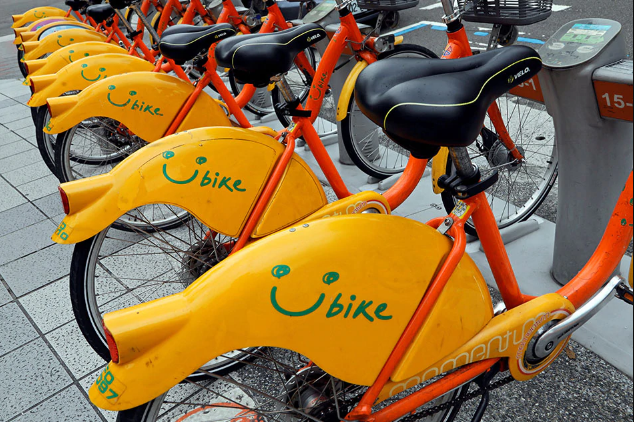

Для начала реализуем класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [76]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        
        
    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        if self.fit_intercept:
            X_ones = np.hstack([X, np.ones((X.shape[0], 1))])
        else:
            X_ones = X

        # self.theta = np.linalg.inv(np.dot(X_ones.T, X_ones) + self.lambd * np.eye(X_ones.shape[1])) @ np.dot(X_ones.T, Y)
        
        # self.coef_ = theta[:-1]
        self.coef_ = np.linalg.inv(np.dot(X_ones.T, X_ones) + self.lambd * np.eye(X_ones.shape[1])) @ np.dot(X_ones.T, Y)
        
        return self
    
    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''

        if self.fit_intercept:
            X_ones = np.hstack([X, np.ones((X.shape[0], 1))])
        else:
            X_ones = X
        
        predictions = np.dot(X_ones, self.coef_)
        
        return predictions

Разделим данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой будем проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую будем использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку будем использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа нужно говорить заказчику.

In [77]:
data = pd.read_csv('./day.csv')[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 
                                 'hum', 'windspeed', 'cnt']]
train, validate = train_test_split(data, test_size=0.4)
validate, test = train_test_split(validate, test_size=0.5)
print(data.shape, train.shape, validate.shape, test.shape)


(731, 11) (438, 11) (146, 11) (147, 11)


Выполним необходимые преобразования признаков. Не забудем о том, что обучать преобразования нужно только по обучающей выборке. Учтем все особенности, которые обсуждались ранее во второй задаче.

In [78]:
train = train[(train.hum >= 0.39)
              & (train.hum <= 0.9) 
              & (train.windspeed <= 0.4) 
              & (train.temp >= 0.15) & (train.temp <= 0.8)]
# test = test[(test.hum >= 0.39)
#               & (test.hum <= 0.9) 
#               & (test.windspeed <= 0.4) 
#               & (test.temp >= 0.15) & (test.temp <= 0.8)]
validate = validate[(validate.hum >= 0.39)
              & (validate.hum <= 0.9) 
              & (validate.windspeed <= 0.4) 
              & (validate.temp >= 0.15) & (validate.temp <= 0.8)]


categorial_features = ['workingday', 'weathersit', 'mnth', 'weekday']  # категориальные признаки
real_features = ['temp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

# учтем нелинейную зависимость температуры
train.temp = train.temp**1.6

encoder = OneHotEncoder(drop='first', sparse_output=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем

scaler = StandardScaler()

# cоединим вместе вещественные признаки и закодированные категориальные
X_train = np.hstack([scaler.fit_transform(train[real_features]), train_cat])
X_train.shape

(397, 23)

Определим сетку значений гиперпараметра $\lambda$ и обучим для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [110]:
grid_lambd = np.logspace(-5, 10, num=200)
model_train = [RidgeRegression(lambd=lambd, fit_intercept=True).fit(X_train, train[target_feature]) for lambd in grid_lambd]

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

Посчитаем ошибку по обучающей выборке.

In [111]:
error_table_train = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE', 'lambd'])
for indx in range(len(model_train)):
    train_preds = model_train[indx].predict(X_train)
    rmse, mae, mape = my_metrics(train, target_feature, train_preds)
    error_table_train.loc[indx, :] = rmse, mae, mape, grid_lambd[indx]
print(error_table_train.MAPE.max())
print(error_table_train.MAPE.min())

99.99999100096369
30.285505279889936


Посчитаем ошибку по валидационной выборке.

In [112]:
valid_cat = encoder.transform(validate[categorial_features])
X_valid = np.hstack([validate[real_features], valid_cat])

In [113]:
error_table_valid = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE', 'lambd'])
for indx in range(len(model_train)):
    valid_preds = model_train[indx].predict(X_valid)
    rmse, mae, mape = my_metrics(validate, target_feature, valid_preds)
    error_table_valid.loc[indx, :] = rmse, mae, mape, grid_lambd[indx]
print(error_table_valid.MAPE.max())
print(error_table_valid.MAPE.min())

222.77408568133902
98.69805581547843


Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

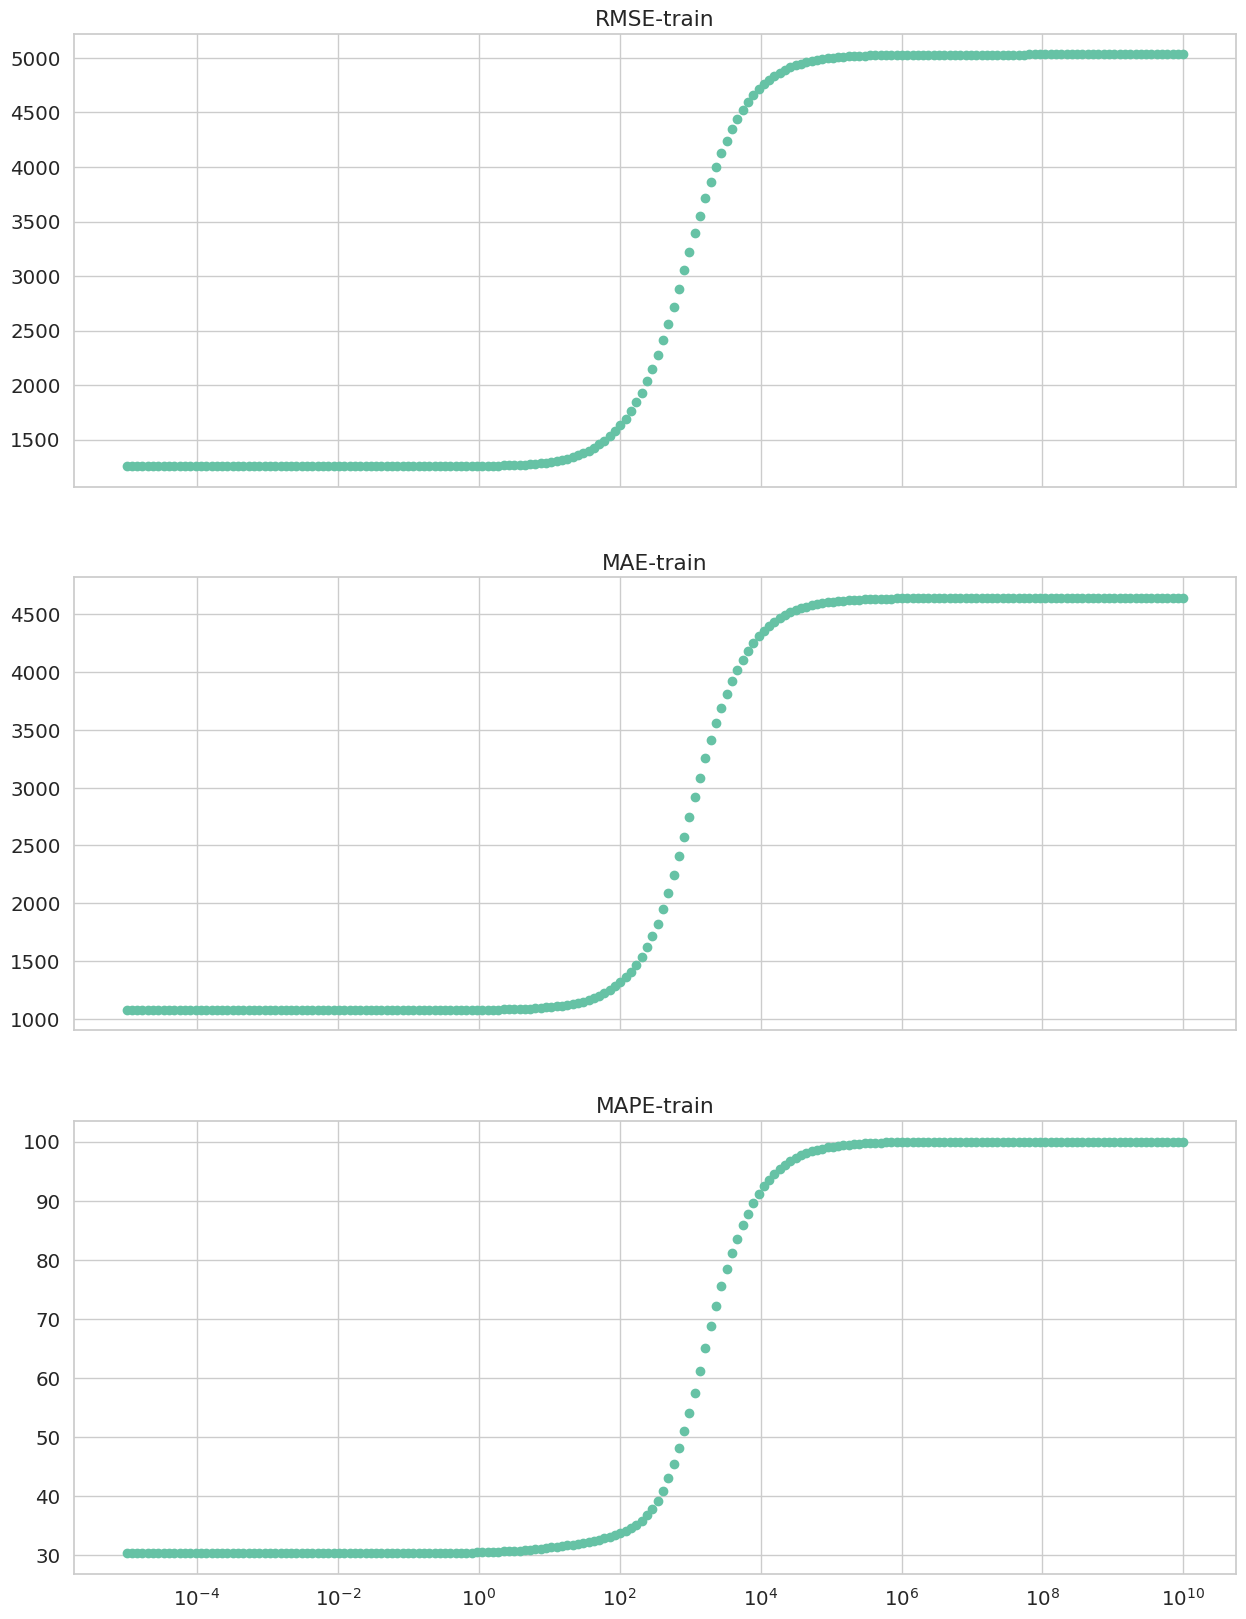

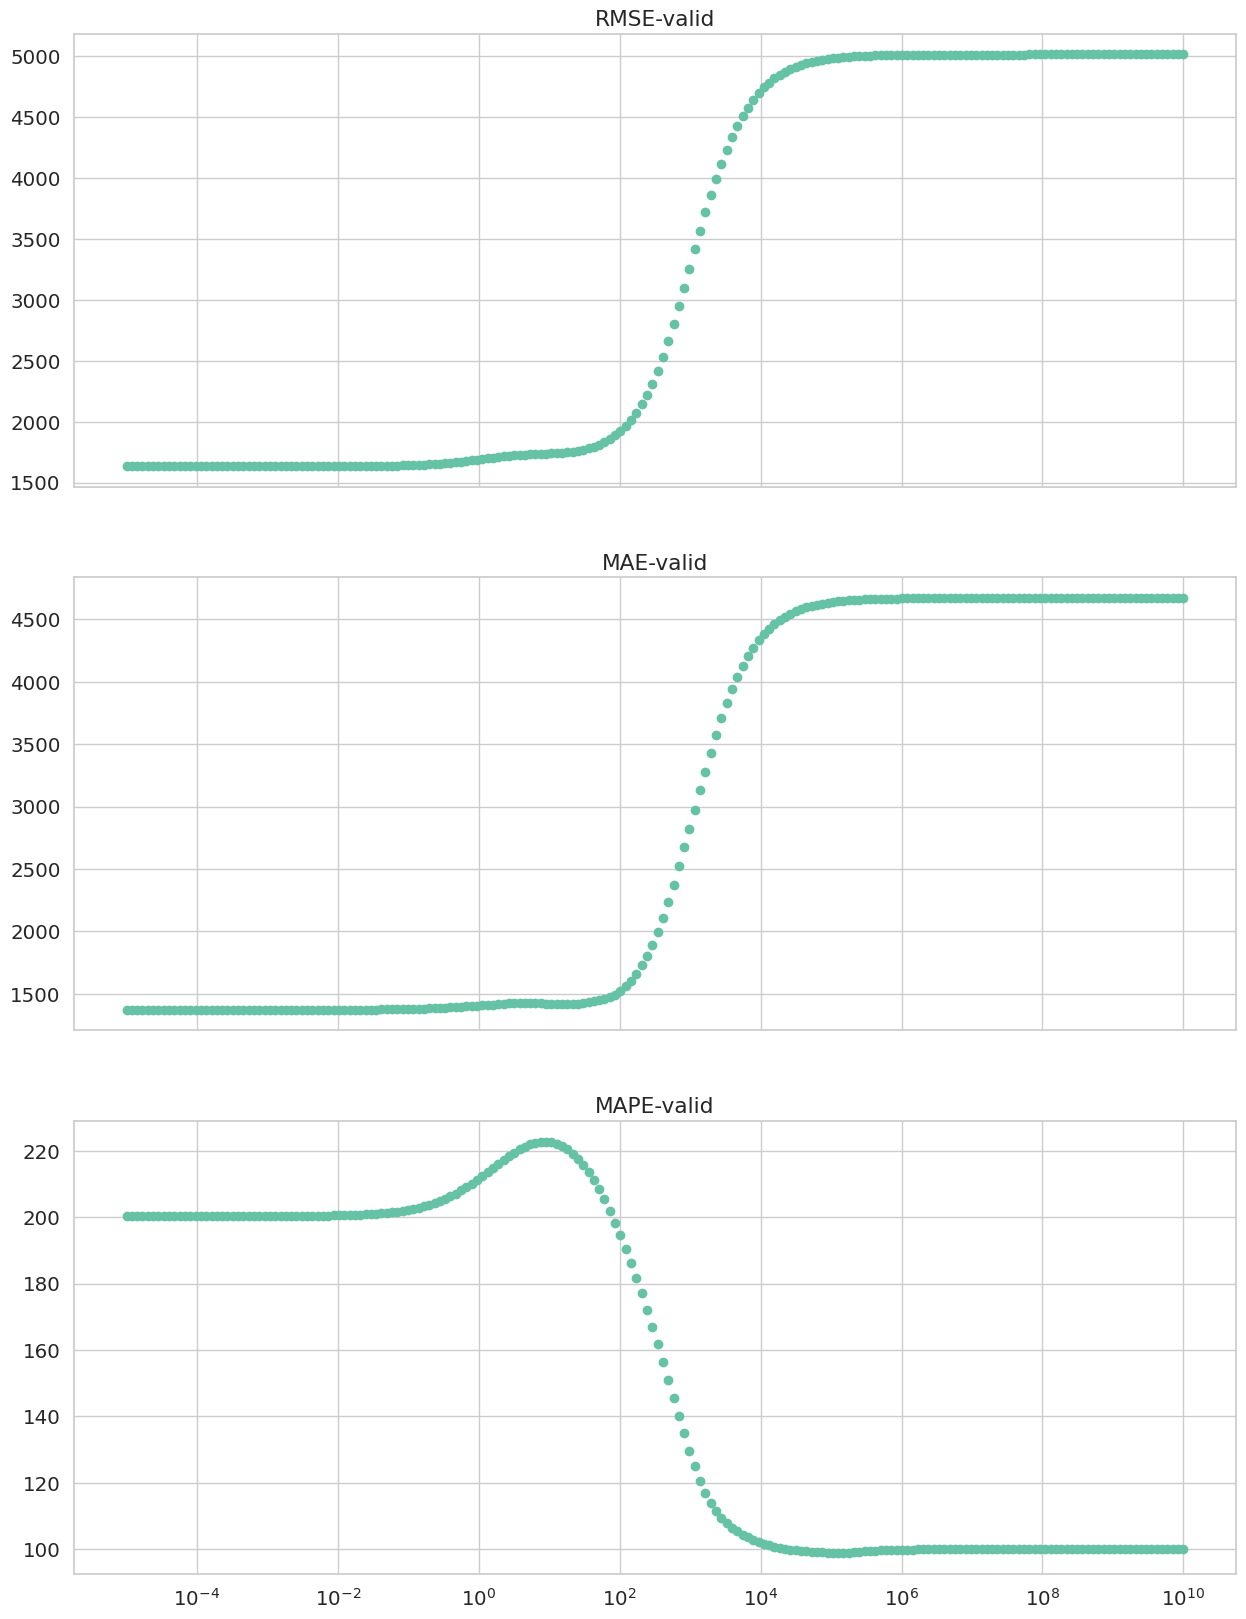

In [114]:
fig, axs = plt.subplots(3, 1, figsize=(15, 20), sharex=True)
plt.xscale("log")
axs[0].set_title('RMSE-train')
axs[0].scatter(x=error_table_train.lambd, y=error_table_train.RMSE)
axs[1].set_title('MAE-train')
axs[1].scatter(x=error_table_train.lambd, y=error_table_train.MAE)
axs[2].set_title('MAPE-train')
axs[2].scatter(x=error_table_train.lambd, y=error_table_train.MAPE)
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(15, 20), sharex=True)
plt.xscale("log")
axs[0].set_title('RMSE-valid')
axs[0].scatter(x=error_table_valid.lambd, y=error_table_valid.RMSE)
axs[1].set_title('MAE-valid')
axs[1].scatter(x=error_table_valid.lambd, y=error_table_valid.MAE)
axs[2].set_title('MAPE-valid')
axs[2].scatter(x=error_table_valid.lambd, y=error_table_valid.MAPE)
plt.show()


Графики показывают примерно схожую зависимость.\
**Обучающая и валидационные выборка**
* Точка минимума не выделяется. Это говорит о том, что подобрать оптимальное значение гиперпараметра труднее.
* Наблюдается тенденция на увеличение значения метрики при увеличении гиперпараметра. Это может указывать на наличие прямой зависимости метрики от гиперпараметра.
* Остутствие стабильности. График демонстрирует стабильные значения MAPE при изменении гиперпараметра лишь в пределах $\lambda < 10^{-3}$ или $\lambda > 10^{4}$.

В обоеих метриках при слишком больших $\lambda$ модель работает плохо. Точность на валидационной значительно хуже.

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

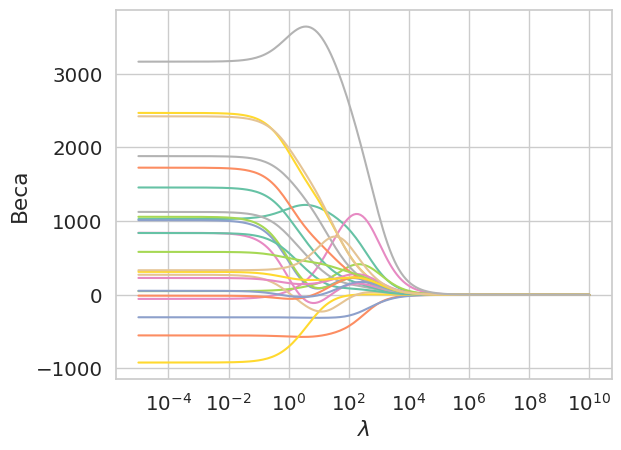

In [115]:
coefs = np.array([model_train[indx].coef_ for indx in range(len(model_train))])

first_idx = 0

for i in range(model_train[0].coef_.size):
    sns.lineplot(x=[m.lambd for m in model_train], y=[m.coef_[i] for m in model_train])
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Веса')
plt.show()

**Ответ**. Видим, что при слишком большом значении $\lambda$ веса зануляются. Это в свою очередь приводит к ухудшению качества предсказания.

Выберем оптимальное значение гиперпараметра и посчитаем ошибку на тестовой выборке.

In [116]:
# выберем нужную модель
mean = error_table_valid.MAPE.mean()
elem = error_table_valid.loc[error_table_valid.MAPE >= mean, 'MAPE'].reset_index().MAPE[0]
idx = error_table_valid[error_table_valid.MAPE == elem].index.to_list()
best_model = model_train[idx[0]]

test.temp = test.temp**1.6

test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([test[real_features], test_cat])

test_preds = best_model.predict(X_test)
rmse, mae, mape = my_metrics(test, target_feature, test_preds)
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")
print(f"MAPE = {mape}")

RMSE = 1698.978680618186
MAE = 1413.0785452213665
MAPE = 47.87497083469239


Сделаем выводы. 
1) Судя по сильно возросшей ошибке на тестовой выборке, модель получилась переобученной. Предположение о том, что виноваты выбросы не оправдалось, поскольку после исключения некоторых точек точность предсказания не возрасла.
2) В области $10^{-2} < \lambda < 10^{1}$ получается резкий скачок. Он может быть связан с переключением между режимами недообучения и переобучения, поэтому было принято решение взять гиперпараметр, соответствующий переходному значению.
3) Введение гипепараметра позволило исправить ошибку, связанную с линейностью параметров. Теперь матрица $X^{T}\cdot X$ не вырождается.